In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
from detecta import detect_peaks
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import math
from scipy.stats import f
#%pip install numpy_indexed
import numpy_indexed as npi
import datetime
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [12]:
df = pd.read_csv("../Kmeans/DataSets/highpressuretrainweatherdata.csv")
#df = pd.read_csv("DataSets/trainingdatanewcleansing.csv")
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

df = df.loc[(df["Phi"] > 0.12) & (df["Phi"] < 0.15)]
df.count()

Unnamed: 0                      35020
MDM current (A)                 35020
Actual Volume Flow (Nm3/sec)    35020
VDV Pos [%] (%)                 35020
IGV Pos [%] (%)                 35020
Isentropic His (J/kg)           35020
Phi                             35020
temp                            35020
dew point                       35020
relative humidity               35020
hourly precip total             35020
snow                                0
wind dir                        35020
wind speed                      35020
peak wind gust                      0
avg sea level air pressure      35020
Clusters                        35020
dtype: int64

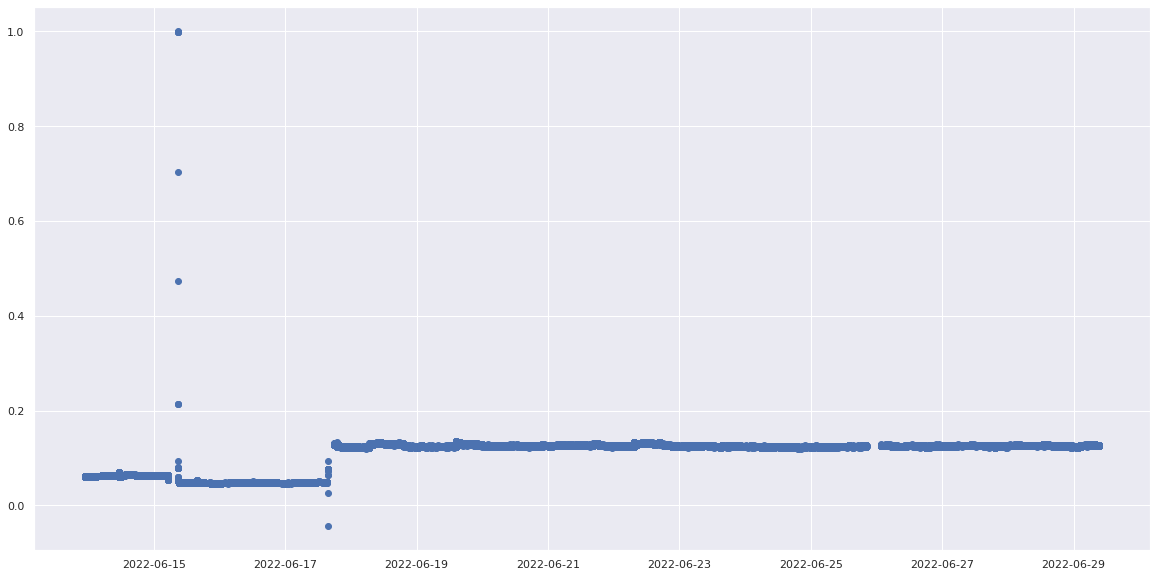

In [10]:
plt.scatter(x=val.index, y=val["Phi"])

In [11]:
val = pd.read_csv("../Kmeans/DataSets/highpressurevalweatherdata.csv")
val['timestamp']= pd.to_datetime(val['timestamp'])
val = val.set_index('timestamp')
val = val.loc[val.index>'2022-06-18']
val.count()

Unnamed: 0                    121467
MDM current (A)               121467
VDV Pos [%] (%)               121467
IGV Pos [%] (%)               121467
Isentropic His (J/kg)         121467
Phi                           121467
temp                          121467
dew point                     121467
avg sea level air pressure    121467
Clusters                      121467
dtype: int64

Inspect Individual IGV and VVD's

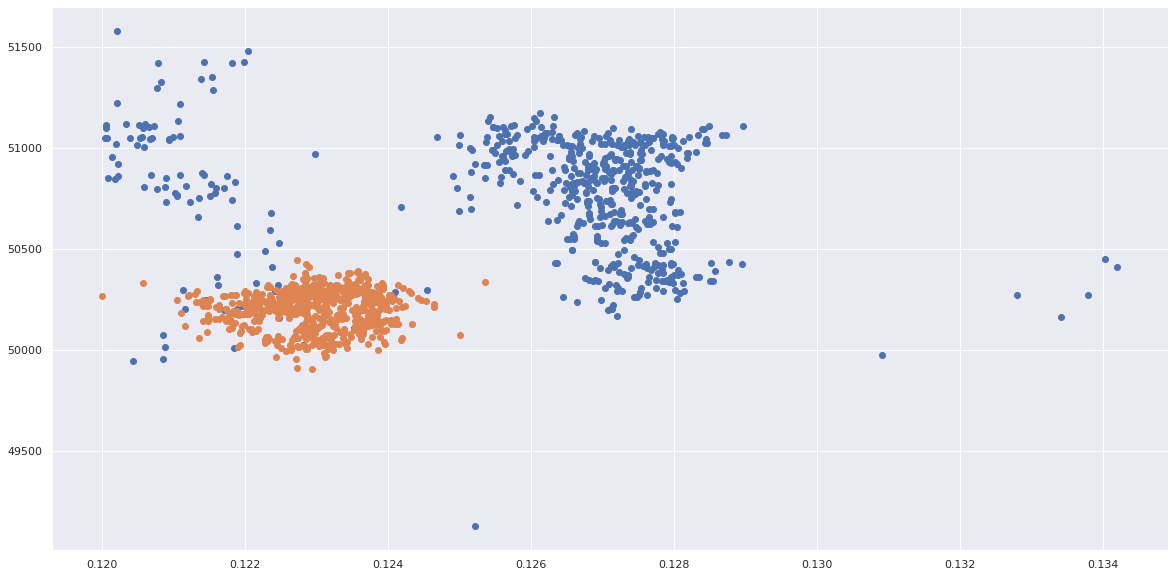

In [14]:
df = df.loc[(df["IGV Pos [%] (%)"]==87) & (df["VDV Pos [%] (%)"]==88)]
val = val.loc[(val["IGV Pos [%] (%)"]==87) & (val["VDV Pos [%] (%)"]==88)]


plt.scatter(x=df["Phi"], y=df["Isentropic His (J/kg)"], label="Ja")
plt.scatter(x=val["Phi"], y=val["Isentropic His (J/kg)"])
